In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from math import sqrt
from scipy.special import factorial
from sympy import integrate, init_printing
init_printing(use_latex="mathjax")
from scipy.special import kv

# Capítulo 3 #

### Problema 3

Create a function that takes in three lists and produces the output in Fig. 3.2. Feel free to use the xscale() and yscale() functions.

***Solución***

Primero hacemos el código del programa dado en el libro:

In [2]:
from math import exp, sin, cos

def f(x):
       return exp(sin(2*x))
    
def fprime(x):
    return 2*exp(sin(2*x))*cos(2*x)

def calc_fd(f,x,h):
    fd = (f(x+h) - f(x))/h
    return fd

def calc_cd(f,x,h):
    cd = (f(x+h/2) - f(x-h/2))/h 
    return cd

if __name__ == "__main__": 
    x = 0.5
    an = fprime(x)
    
    hs = [10**(-i) for i in range(1,12)]
    fds = [abs(calc_fd(f,x,h) - an) for h in hs] 
    cds = [abs(calc_cd(f,x,h) - an) for h in hs]
    rowf = "{0:1.0e} {1:1.16f} {2:1.16f}"
    print("h abs. error in fd abs. error in cd") 
    for h,fd,cd in zip(hs,fds,cds):
        print(rowf.format(h,fd,cd))

h abs. error in fd abs. error in cd
1e-01 0.3077044583376249 0.0134656094697689
1e-02 0.0260359156901186 0.0001350472492652
1e-03 0.0025550421497806 0.0000013505116288
1e-04 0.0002550180941236 0.0000000135077878
1e-05 0.0000254969542519 0.0000000001051754
1e-06 0.0000025492660578 0.0000000002500959
1e-07 0.0000002564334673 0.0000000011382744
1e-08 0.0000000255070782 0.0000000189018428
1e-09 0.0000000699159992 0.0000000699159992
1e-10 0.0000021505300500 0.0000021505300500
1e-11 0.0000332367747395 0.0000111721462455


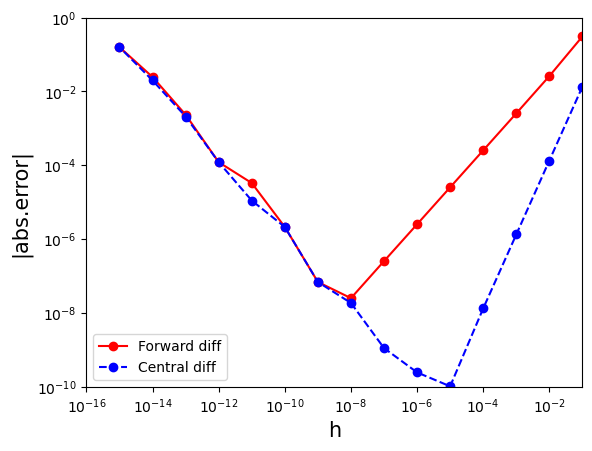

In [3]:
hs=[10**(-i) for i in range(1,16)]
plt.loglog(hs,[abs(calc_fd(f,x,h) - an) for h in hs],"ro-",label="Forward diff")
plt.loglog(hs,[abs(calc_cd(f,x,h) - an) for h in hs],"bo--",label="Central diff")
plt.ylim(0.0000000001,1)
plt.xlim(0.0000000000000001,0.1)
plt.xlabel("h", fontsize=15)
plt.ylabel("|abs.error|", fontsize=15)
plt.legend()
plt.show()

### Problema 6

Show Eq. (3.27) by combining the Taylor series for $f(x+h)$ and $f(x+h/2)$. Then, show Eq. (3.28) by subtracting two pairs of Taylor series (pairwise): $f(x+h/2)$ and $f(x−h/2)$, on the one hand, $f(x+3h/2)$ and $f(x−3h/2)$, on the other.

***Solución***

Para demostrar la ecuación 3.27 nos piden el desarrollo en serie de $f(x+h)$ y $f(x+h/2)$ los cuales son los siguientes:

$$f(x+h)=f(x)+hf'(x)+\frac{h^2}{2}f''(x)+\frac{h^3}{6}f'''(x)+...$$

$$f(x+\frac{h}{2})=f(x)+\frac{h}{2}f'(x)+\frac{h^2}{8}f''(x)+\frac{h^3}{48}f'''(x)+...$$

(aquí truncamos hasta la tercer derivada porque es el orden al que llega la ecuación que queremos demostrar) calculamos:

$$f\left(x+\frac{h}{2}\right)-\frac{1}{4}f(x+h)=f(x)+\frac{h}{2}f'(x)+\frac{h^2}{8}f''(x)+\frac{h^3}{48}f'''(x)-\frac{1}{4}f(x)-\frac{h}{4}f'(x)-\frac{h^2}{8}f''(x)-\frac{h^3}{24}f'''(x)$$

simplificando términos:

$$f\left(x+\frac{h}{2}\right)-\frac{1}{4}f(x+h)=\frac{3}{4}f(x)+\frac{h}{4}f'(x)-\frac{h^3}{48}f'''(x)$$

Despejando a $f'(x)$:

$$\frac{h}{4}f'(x)=f\left(x+\frac{h}{2}\right)-\frac{1}{4}f(x+h)-\frac{3}{4}f(x)+\frac{h^3}{48}f'''(x)$$

Finalmente:

$$f'(x)=\frac{4f\left(x+\frac{h}{2}\right)-f(x+h)-3f(x)}{h}+\frac{h^2}{12}f'''(x)$$

que es la ecuación 3.27.

Ahora para la demostración de la ecuación de 3.28 nos piden restar dos pares de funciones, primero $f(x+h/2)$ con $f(x-h/2)$ y $f(x-3/2h)$ con $f(x+3/2h)$, primero hacemos el desarrollo de dichas series:

$$f\left(x+\frac{h}{2}\right)=f(x)+\frac{h}{2}f'(x)+\frac{h^2}{8}f''(x)+\frac{h^3}{48}f'''(x)+\frac{h^4}{348}f^{(4)}(x)+\frac{h^5}{3480}f^{(5)}(x)+...$$

$$f\left(x-\frac{h}{2}\right)=f(x)-\frac{h}{2}f'(x)+\frac{h^2}{8}f''(x)-\frac{h^3}{48}f'''(x)+\frac{h^4}{348}f^{(4)}(x)-\frac{h^5}{3480}f^{(5)}(x)+...$$

Calculamos la resta:

$$f\left(x+\frac{h}{2}\right)-f\left(x-\frac{h}{2}\right)=hf'(x)+\frac{h^3}{24}f'''(x)+\frac{h^5}{1920}f^{(5)}(x)$$

Despejando a $f'(x)$ se obtiene:

\begin{equation}
f'(x)=\frac{1}{h}f\left(x+\frac{h}{2}\right)-\frac{1}{h}f\left(x-\frac{h}{2}\right)-\frac{h^2}{24}f'''(x)-\frac{h^4}{1920}f^{(5)}(x)
\label{eq:1}
\end{equation}

Para las otras dos series que nos piden el desarrollo es el siguiente:

$$f\left(x+\frac{3}{2}h\right)=f(x)+\frac{3}{2}hf'(x)+\frac{9}{8}h^2f''(x)+\frac{9}{16}h^3f'''(x)+\frac{27}{128}h^4f^{(4)}(x)+\frac{81}{1280}h^5f^{(5)}(x)+...$$

$$f\left(x-\frac{3}{2}h\right)=f(x)-\frac{3}{2}hf'(x)+\frac{9}{8}h^2f''(x)-\frac{9}{16}h^3f'''(x)+\frac{27}{128}h^4f^{(4)}(x)-\frac{81}{1280}h^5f^{(5)}(x)+...$$

Ahora calculamos:

$$f\left(x-\frac{3}{2}h\right)-f\left(x+\frac{3}{2}h\right)=-3hf'(x)-\frac{9}{8}h^3f'''(x)-\frac{81}{640}$$

despejando a $f'(x)$:

\begin{equation}
f'(x)=\frac{1}{3h}f\left(x+\frac{3}{2}h\right)-\frac{1}{3h}f\left(x-\frac{3}{2}h\right)-\frac{3}{8}h^2f'''(x)-\frac{27}{640}h^4f^{(5)}(x)
\label{eq:2}
\end{equation}

Si multiplicamos la ecuación \@ref(eq:1) por 9 y le restamos la \@ref(eq:2) obtenemos lo siguiente:

$$8f'(x)=\frac{9}{h}f\left(x+\frac{h}{2}\right)-\frac{9}{h}f\left(x-\frac{h}{2}\right)-\frac{3}{8}h^2f'''(x)-\frac{3}{340}h^4f^{(5)}(x)-\frac{1}{3h}f\left(x+\frac{3}{2}h\right)+\frac{1}{3h}f\left(x-\frac{3}{2}h\right)+\frac{3}{8}h^2f'''(x)+\frac{27}{640}h^4f^{(5)}(x)$$

Despejando $f'x$ y agrupando términos:

$$f'(x)=\frac{27f\left(x+\frac{h}{2}\right)+f\left(x-\frac{3}{2}h\right)-27f\left(x-\frac{h}{2}\right)-f\left(x+\frac{3}{2}h\right)}{24h}+\frac{3}{640}h^4f^{(5)}(x)+...$$

### Problema 9

In section 2.5 we introduced Legendre polynomials via Eq. (2.81), the generating function which led to a recurrence relation, Eq. (2.86). Here we discuss another representation of Legendre polynomials, that produced by $\textit{Rodrigues’ formula}$:

$$P_n(x)=\frac{1}{2^nn!}\frac{d^n}{dx^n}[(x^2-1)^n] $$

(a) Analytically derive the leading coefficient of the Legendre polynomial:

$$a_n=\frac{(2n)!}{2^n(n!)^2}$$

This $a_n$ is the coefficient multiplying $x^n$ when you expand $P_n(x)$ out. 

(b) For $h=0.01$ employ Eq (3.24) and Rodrigues’ formula to compute $P_1(x)$.Then, compute the central-difference approximation to the second derivative (as the central difference of the central difference) to compute $P_2(x)$. Keep calling the earlier central-difference function(s) and go up to $P_8(x)$. Each time, you should plot your function against the output of legendre.py.

(c) What happens if you change $h$ to $10^{−3}$?

***Solución***

*Inciso (a)*

**Inciso (b)**

Primero hacemos un programa donde f son los polinomios de Legendre



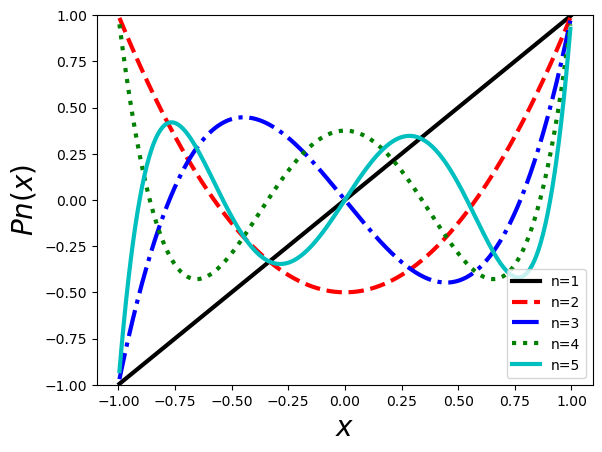

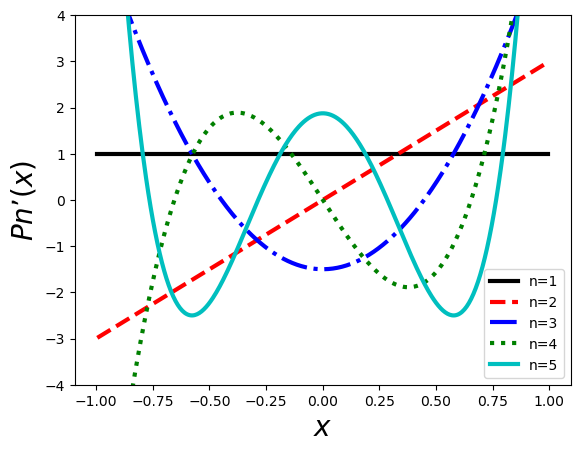

In [44]:
def legendre(n,x):
    if n==0:
        val2 = 1.
        dval2 = 0.
    elif n==1:
        val2 = x
        dval2 = 1.
    else:
        val0 = 1.; val1 = x 
        for j in range(1,n):
            val2 = ((2*j+1)*x*val1 - j*val0)/(j+1)
            val0, val1 = val1, val2 
        dval2 = n*(val0-x*val1)/(1.-x**2)
    return val2, dval2

def plotlegendre(der,nsteps): 
    plt.xlabel("$x$", fontsize=20)

    dertostr = {0: "$P n(x)$", 1: "$P n’(x)$"} 
    plt.ylabel(dertostr[der], fontsize=20)
    
    ntomarker = {1: "k-", 2: "r--", 3: "b-.", 4: "g:", 5: "c"}
    xs = [i/nsteps for i in range(-nsteps+1,nsteps)]
    for n,marker in ntomarker.items():
        ys = [legendre(n,x)[der] for x in xs]
        labstr = "n={0}".format(n)
        plt.plot(xs, ys, marker, label=labstr, linewidth=3)
        
    plt.ylim(-3*der-1, 3*der+1) 
    plt.legend(loc=4) 
    plt.show()
    
if __name__ == "__main__": 
    nsteps = 200
    plotlegendre(0,nsteps)
    plotlegendre(1,nsteps)

1.5*x**2 - 0.5
1.5000000000000013
-1.9700000000000004
1.5150374999999996
1.4850375


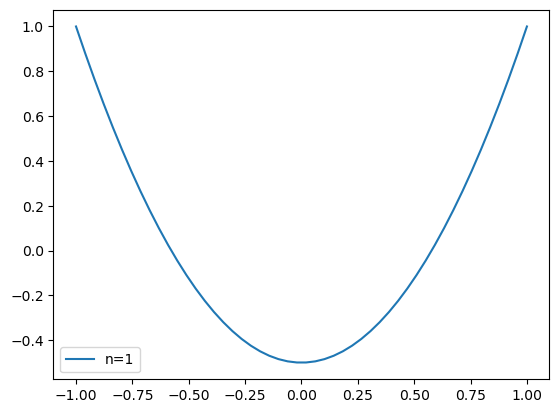

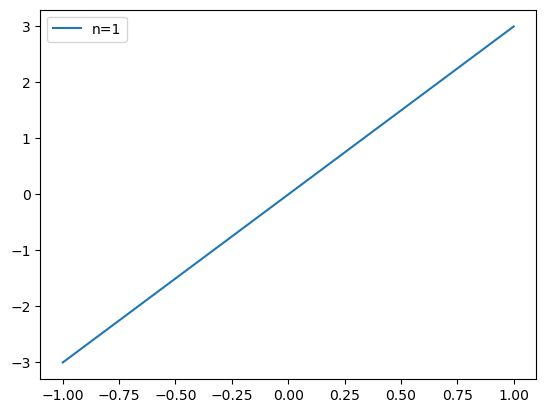

In [53]:
x=sp.Symbol('x') 
def f(n):
    an=1/((2**n)*factorial(n))
    y=(x**2-1)**n
    f=sp.diff(y,x,n)
    f=an*f
    return f

p1=sp.lambdify(x,f(1))
p2=sp.lambdify(x,f(2))
p3=sp.lambdify(x,f(3))
p4=sp.lambdify(x,f(4))
p5=sp.lambdify(x,f(5))
p6=sp.lambdify(x,f(6))
p7=sp.lambdify(x,f(7))
p8=sp.lambdify(x,f(8))
v_x=np.linspace(-1,1)

pl1=p1(v_x)
pl2=p2(v_x)
pl3=p3(v_x)
pl4=p4(v_x)
pl5=p5(v_x)
pl6=p6(v_x)
pl7=p7(v_x)
pl8=p8(v_x)


#La ecuación 3.24 para la primer derivada es
def der(fun,x,h):
    return (fun(x+h/2)-fun(x-h/2))/(h)

#La ecuación 3.32 es para la segunda derivada
def der2(fun,x,h):
    return (fun(x+h/2)-fun(x-h/2)-2*fun(x))

print(f(2))
print(der(p2,0.5,0.01))
print(der2(p2,1,0.01))

r=3/2*(1+0.01/2)**2
s=3/2*(1-0.01/2)**2
print (r)
print(s)

plt.plot(v_x,pl2,label="n=1")
plt.legend()
plt.show()

plt.plot(v_x,der(p2,v_x,0.01), label="n=1")
plt.legend()
plt.show()



### Problema 12

This problem deals with our analytical expectations for the total error, $\varepsilon = \varepsilon_{app}+\varepsilon_{ro}$, for Eq. (3.40) and Eq. (3.41). Let $h$ take on the values $10^{−1}$, $10^{−2}$, $10^{−3}$, $10^{−4}$ and plot the total error for the two cases. Assume $f(x)=1$, $f''(x)=0.1$, and $f'''(x)=100$. Do you understand these results?

**Solución**

Las ecuaciones que nos piden son:

$$\varepsilon=\varepsilon_{app}+\varepsilon_{ro}=\frac{h}{2}|f''(x_i)|+\frac{2|f(x_i)|\epsilon_m}{h}$$

$$\varepsilon=\varepsilon_{app}+\varepsilon_{ro}=\frac{h^2}{6}|f'''(x_i)|+\frac{|f(x_i)|\epsilon_m}{h}$$

Definimos nuestras funciones en Python:

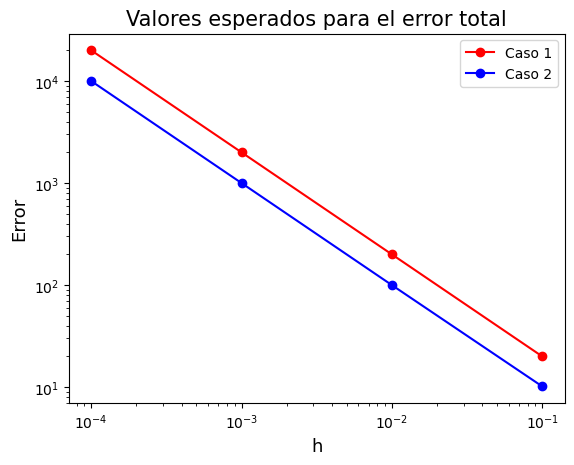

In [39]:
def error1(h):
    return h/2*sp.Abs(0.1)+(2*sp.Abs(1))/h

def error2(h):
    return h**2/6*sp.Abs(100)+(sp.Abs(1))/h

hs=[10**(-i) for i in range(1,5)]
plt.loglog(hs,[error1(h) for h in hs],"ro-",label="Caso 1")
plt.loglog(hs,[error2(h) for h in hs],"bo-",label="Caso 2")
plt.legend()
plt.title("Valores esperados para el error total",fontsize=15)
plt.xlabel("h",fontsize=13)
plt.ylabel("Error",fontsize=13)
plt.show()

Vemos que cuando h se va haciendo más pequeño el error crece exponencialmente.

### Problema 15

In the main text we derived a second central-difference formula for the first derivative in two distinct ways, using Taylor series and using Richardson extrapo- lation. Correspondingly derive a second central-difference formula for the second derivative.

### Problema 18

For this problem you will need to make sure JAX is installed on your system.Use the grad() function to automatically differentiate $f(x)=e^{sin(2x)}$ at x=0.5, comparing to the answer mentioned in the main text. Be sure to enable double precision.